<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem2_Practica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Comprobamos que no hay nulos

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


a) Mapa de Calor (Heatmap):

* Objetivo: Visualizar la correlación entre las variables numéricas en el dataset.
* Instrucciones: Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).
* Asegúrate de personalizar el mapa con una paleta de colores y etiquetas en los ejes.

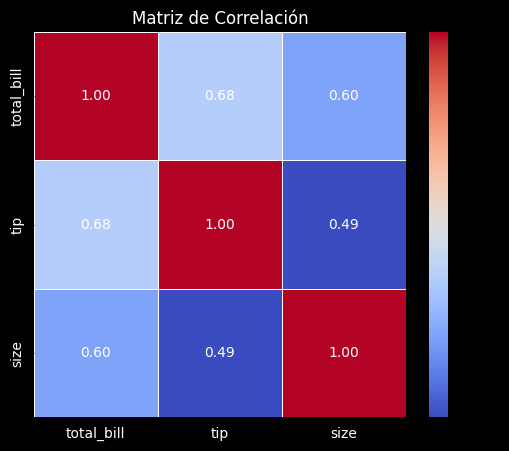

In [9]:
# Calcular la matriz de correlación
corr = df[["total_bill", "tip", "size"]].corr()
plt.figure(figsize=(6,5), facecolor='black')
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"color": "white"},  # color de los números
    cbar_kws={"label": "Correlación"}  # barra de color
)
plt.title('Matriz de Correlación', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

b) Diagrama de Violín:

* Objetivo: Mostrar la distribución de las propinas (tip) para diferentes días de la semana.
* Instrucciones: Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).
Personaliza el gráfico con colores y etiquetas adecuadas.

/tmp/ipython-input-3911353126.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = graf_v.legend(frameon=True)


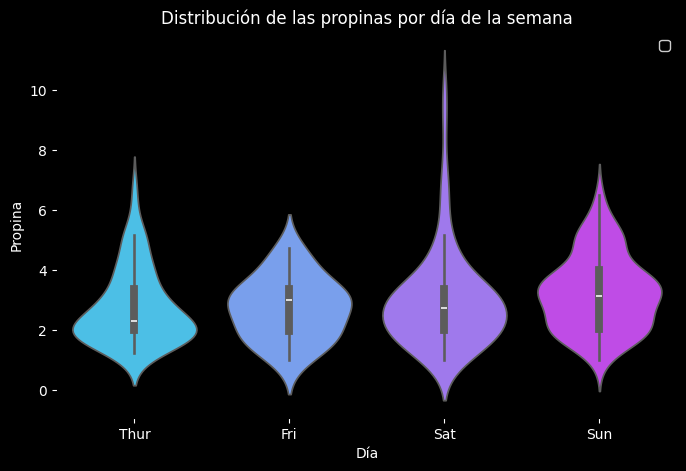

In [52]:
plt.figure(figsize=(8,5), facecolor='black')
graf_v = sns.violinplot(
    x='day',
    y='tip',
    data=df,
    palette='cool',
    hue='day',
    split=False
)
graf_v.set_facecolor('black')
# Títulos y etiquetas en blanco
graf_v.set_title('Distribución de las propinas por día de la semana', color='white')
graf_v.set_xlabel('Día', color='white')
graf_v.set_ylabel('Propina', color='white')
# Ticks en blanco
graf_v.tick_params(colors='white')
legend = graf_v.legend(frameon=True)
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('white')
for text in legend.get_texts():
    text.set_color('white')
plt.show()


c) Gráfico de dispersión (Scatter Plot):

* Objetivo: Analizar la relación entre el total de la cuenta (total_bill) y la propina (tip).
* Instrucciones: Crea un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.

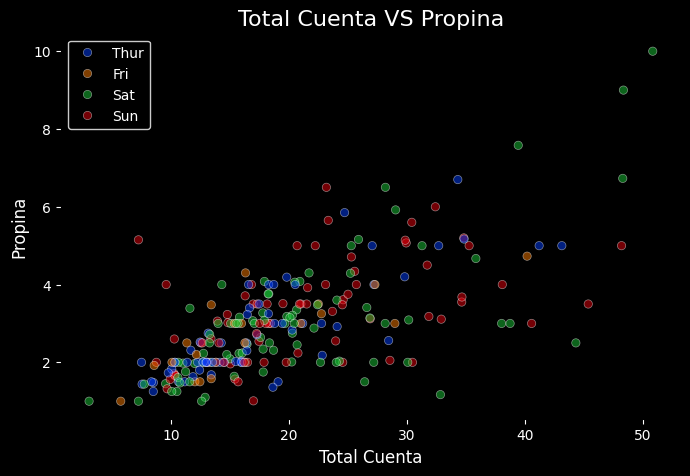

In [53]:
plt.figure(figsize=(8,5), facecolor='black')
graf_disp = sns.scatterplot(
    x='total_bill',
    y='tip',
    data=df,
    hue='day',
    palette='bright',
    alpha=0.5,
    )
graf_disp.set_facecolor('black')

# Títulos y etiquetas en blanco
graf_disp.set_title('Total Cuenta VS Propina', color='white', fontsize=16)
graf_disp.set_xlabel('Total Cuenta', color='white', fontsize=12)
graf_disp.set_ylabel('Propina', color='white', fontsize=12)
graf_disp.tick_params(colors='white')
legend = graf_disp.legend(frameon=True)
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('white')
for text in legend.get_texts():
    text.set_color('white')
plt.show()


d) Gráfico de barras (Bar Plot):

* Objetivo: Comparar el promedio de la propina (tip) por género (sex).
* Instrucciones: Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).

In [43]:
aux = df.groupby('sex', observed=False)['tip'].mean().reset_index()
aux

,sex,tip
0,Male,3.089618
1,Female,2.833448


/tmp/ipython-input-3119258759.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = graf_bar.legend(frameon=True)


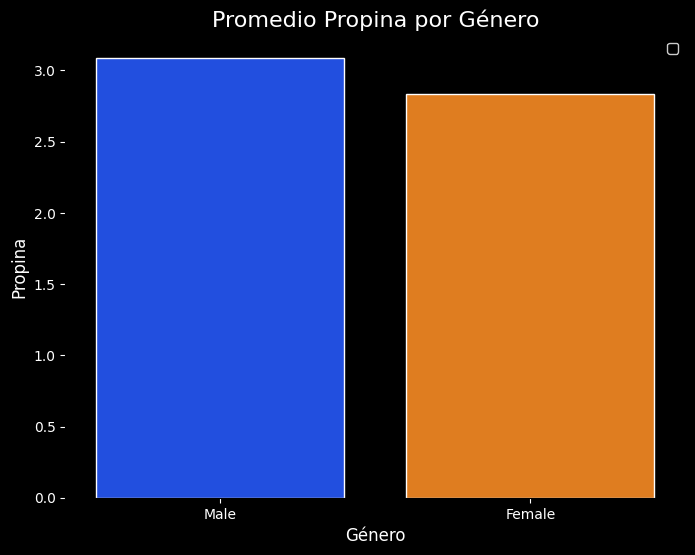

In [54]:
plt.figure(figsize=(8,6), facecolor='black')
graf_bar = sns.barplot(
    x='sex',
    y='tip',
    data=aux,
    palette='bright',
    hue='sex',
    edgecolor='white',
)
graf_bar.set_facecolor('black')

graf_bar.set_title('Promedio Propina por Género', color='white', fontsize=16)
graf_bar.set_xlabel('Género', color='white', fontsize=12)
graf_bar.set_ylabel('Propina', color='white', fontsize=12)
graf_bar.tick_params(colors='white')
legend = graf_bar.legend(frameon=True)
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('white')
for text in legend.get_texts():
    text.set_color('white')
plt.show()
